# Tarea 4

**Envío del PR inicial:** lunes 26 de septiembre

**Aceptación del PR:** 

**Ejercicio 0:** Velocidad de convergencia

El objetivo de este ejercicio es relacionar, la velocidad de convergencia con que un punto fijo (o una órbita periódica, en el caso de los dos último incisos) atraen a puntos suficientemente cercanos, con la derivada del mapeo en el punto fijo (o ciclo periódico). La idea es, entonces, calcular primero el punto fijo y, después, medir cómo la distancia de los iterados sucesivos (de una condición inicial $x_0$) al punto fijo se comporta en el tiempo, para los siguientes mapeos:

- $F(x) = x^2+0.25$

- $F(x) = 3x(1-x)$

- $F(x) = \exp(x-1)$

- $F(x) = x^2 - 1.25$

- $F(x) = \exp(x+1)$

  Deberán resolver algunas cosas intermedias. Por ejemplo, ¿qué tanto deben acercarse al punto fijo, a fin de evitar ruido numérico? ¿Qué hay que hacer en el caso en que el punto sea neutral (ni atractivo ni repulsivo)?

  En los dos últimos incisos, el interés es en los ciclos de periodo 2.

In [1]:
using Plots, PlotRecipes
pyplot()
using LaTeXStrings;
using TaylorSeries

    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /Users/usuario/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.DataArray, AbstractArray) at /Users/usuario/.julia/v0.4/DataArrays/src/operators.jl:276.
To fix, define 
    +(DataArrays.DataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.
    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /Users/usuario/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.AbstractDataArray, AbstractArray) at /Users/usuario/.julia/v0.4/DataArrays/src/operators.jl:300.
To fix, define 
    +(DataArrays.AbstractDataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.


In [2]:
F_1(x)=x^2+0.25
F_1´(x)=2*x
F_2(x)=3*x*(1-x)
F_2´(x)=3-6*x
F_3(x)=exp(x-1)
F_3´(x)=exp(x-1)
F_4(x)=x^2-1.25
F_4´(x)=2*x
F_5(x)=exp(x+1)
F´_5(X)=exp(x+1);

In [3]:
"""función que itera m veces un mapeo f(x) a patir de una condición inicial x_0
Devuelve los puntos x_n para toda n=1,2,...m en forma en un arreglo xvec"""
function iter_map(f::Function,x_0::Float64,m::Int)
    x=x_0
    xvec=Float64[]
    fvec=Float64[]
    #push!(xvec,x)
    for i in 1:m
        x=f(x)
        push!(xvec,x)
    end 
    return xvec
end 
        

iter_map (generic function with 1 method)

## Análisis de $ F_1(x)=x^2+0.25$

[Plots.jl] Initializing backend: pyplot



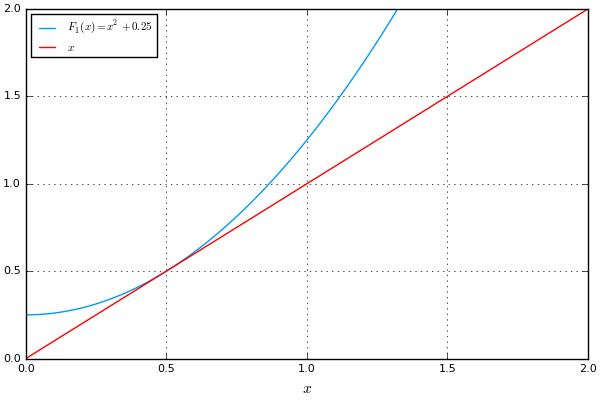

In [4]:
xrange=0:1/2^8:2
plot(xrange,F_1,ylim=(0,2),label=L"F_1(x)=x^2+0.25")
plot!(xrange,identity,color=:red,label=L"x")
xlabel!(L"x")


Resolviendo $x^2+0.25=x$ se obtiene que el punto fijo es $$x=\frac{1\pm\sqrt{0}}{2}=1/2$$
La derivada ahí vale 
$$F_1´(1/2)=1$$
Por tanto no es posible concluir si el punto fijo es atractivo o repulsivo. 
Para ello tomemos varias condiciones iniciales y veamos como evoluciona la distancia 
$$|f^n(x_0)-x^*|$$ con respecto a $n$.

Entonces **la estrategia a segir para las 5 funciones será** encontrar sus puntos fijos, luego iterar la función $n$ veces y graficar 

$$|f^n(x_0)-x^*| \ vs. \ n $$

In [5]:
m=400
x1=iter_map(F_1,0.,m)
x2=iter_map(F_1,0.48,m)
x3=iter_map(F_1,-0.39,m);
x1p=abs(x1-0.5)
x2p=abs(x2-0.5)
x3p=abs(x3-0.5);


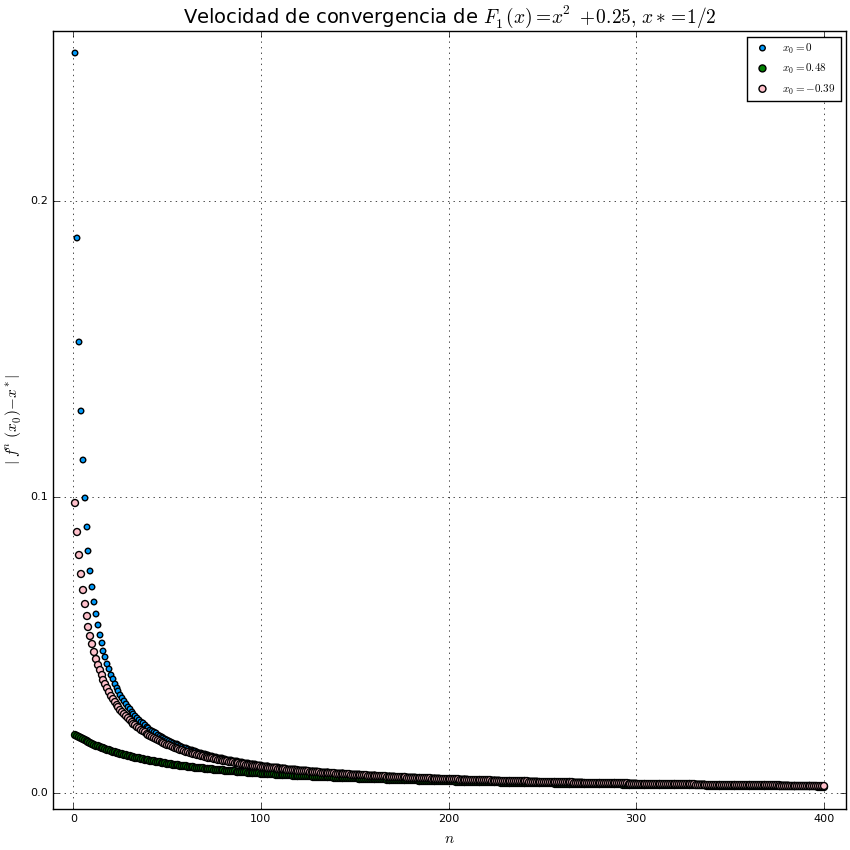

In [6]:
scatter(x1p,label=L"$x_0=0$",markersize=4,size=(850,850))
ylabel!(L"$| \ f^n (x_0)-x^{*}|$")
xlabel!(L"n")
title!(L"Velocidad de convergencia de $F_1(x)=x^2+0.25, \ x*=1/2 $")
scatter!(x2p,label=L"$x_0=0.48$",c=:green,markersize=5,size=(850,850))

scatter!(x3p,label=L"$x_0=-0.39$",c=:pink,markersize=5,size=(850,850))

In [7]:
N=111
x4=iter_map(F_1,0.51,N)
x5=iter_map(F_1,1.3,7)
x6=iter_map(F_1,-0.55,20);
x4p=abs(x4-0.5)
x5p=abs(x5-0.5)
x6p=abs(x6-0.5);


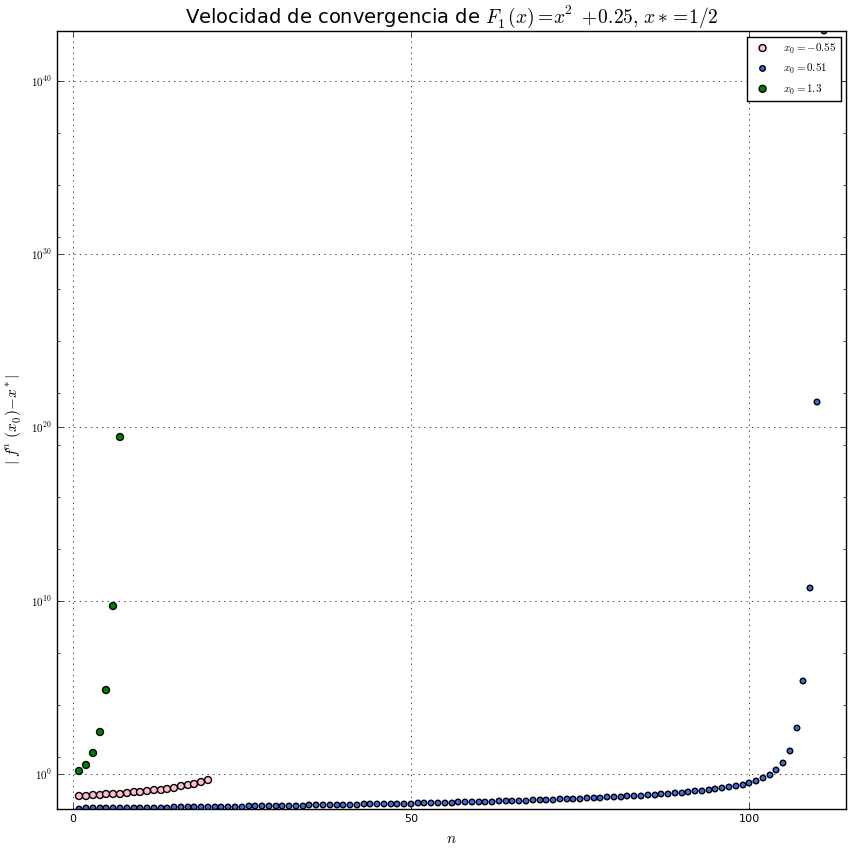

In [8]:
scatter(x6p,label=L"$x_0=-0.55$",c=:pink,markersize=5,size=(850,850))
scatter!(x4p,label=L"$x_0=0.51$",c=:royalblue,markersize=4,size=(850,850))
scatter!(x5p,label=L"$x_0=1.3$",c=:green,markersize=5,size=(850,850))
ylabel!(L"$| \ f^n (x_0)-x^{*}|$")
xlabel!(L"n")
title!(L"Velocidad de convergencia de $F_1(x)=x^2+0.25, \ x*=1/2 $")
yaxis!(:log10)

###Observaciones:
De la primera gráfica vemos que las distancias de las $x_n$ al punto fijo $x*$ a partir de las tres condiciones iniciales convergenn a cero. Esto quiere decir que para estas tres condiciones iniciales, el **punto fijo se comporta como un atractor**. Si observamos también las pendientes de las curvas dibujadas podemos hablar de la velociadad de convergencia y vemos que en valor absoluto, la condición inicial $x_0=0$ tiene la pendiente mas grande. Esto es que tal condición inicial converge más rápido al punti fijo. 
Entre más cercana al punto fijo esobservaremos que la convergencia es más lenta.

Por otro lado, si observamos la segunda gráfica vemos que para condiciones iniciales cuyo valor absoluto es mayor a 0.5 el punto fijo se comporta como un punto fijo repulsor y de nuevo entre más lejano esté la condición inicial, más rápido se alejan los iterados de el punto fijo. La escala logarítmica se utilizó para ver que en efecto, la velocidad de "divergencia" para estos puntos fijos, es brutal.

Con estas observaciones podemos ver que existe un intervalo de condiciones iniciales para las cuales el punto fijo $x^*=1/2$ se comporta como un atractor y fuera de este intervalo, el punto fijo es un repulsor. Esto es: 

$x^*$ es punto fijo atractor $\forall x_0 \in [-0.5,0.5]$

$x^*$ es punto fijo repulsor $\forall x_0 \notin [-0.5,0.5]$

## Análisis de  $F_2(x) = 3x(1-x)$


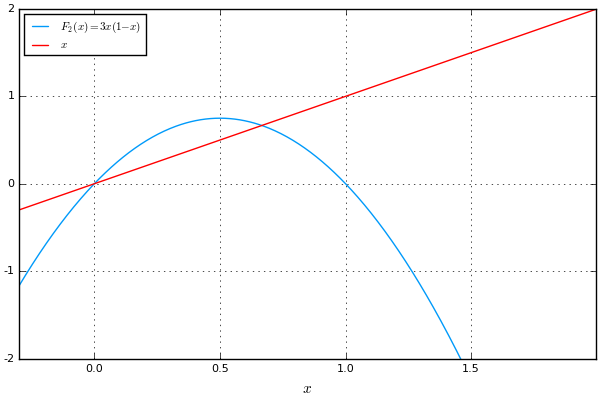

In [9]:
xrange=-0.3:1/2^8:2
plot(xrange,F_2,ylim=(-2,2),label=L"F_2(x)=3x(1-x)")
plot!(xrange,identity,color=:red,label=L"x")
xlabel!(L"x")


$F_2$ tiene dos puntos fijos, como se puede observar de la intersección de su gráfica con la identidad.
Resolviendo $3x(1-x)=x$ se obtiene que los puntos fijos son:
$$x_1^*=0 \ , \ x_2^*=2/3$$

La derivada del mapeo es $F´(x)=3-6x$, que evaluada en los puntos fijos, da:

$$F´(x_1^*)=3 \ , F´(x_2^*)=-1$$

Por lo tanto $x_1^*$ **es un repulsor** y para el segundo no podemos concluir si es atractor o repulsor. Hagamos el análisis de la velocidad de convergencia e iteremos las condiciones iniciales $x_0=0.25,0.5,0.75,-0.1,1.49,1.5$

In [10]:
m=50
x1=iter_map(F_2,0.25,m)
x2=iter_map(F_2,0.5,m)
x3=iter_map(F_2,0.75,m)
x4=iter_map(F_2,-0.4,6) #diverge
x5=iter_map(F_2,1.1,6) #superestable??
x6=iter_map(F_2,1.5,6);#explota
x1p=abs(x1-2/3)
x2p=abs(x2-2/3)
x3p=abs(x3-2/3)
x4p=abs(x4-2/3)
x5p=abs(x5-2/3)
x6p=abs(x6-2/3);


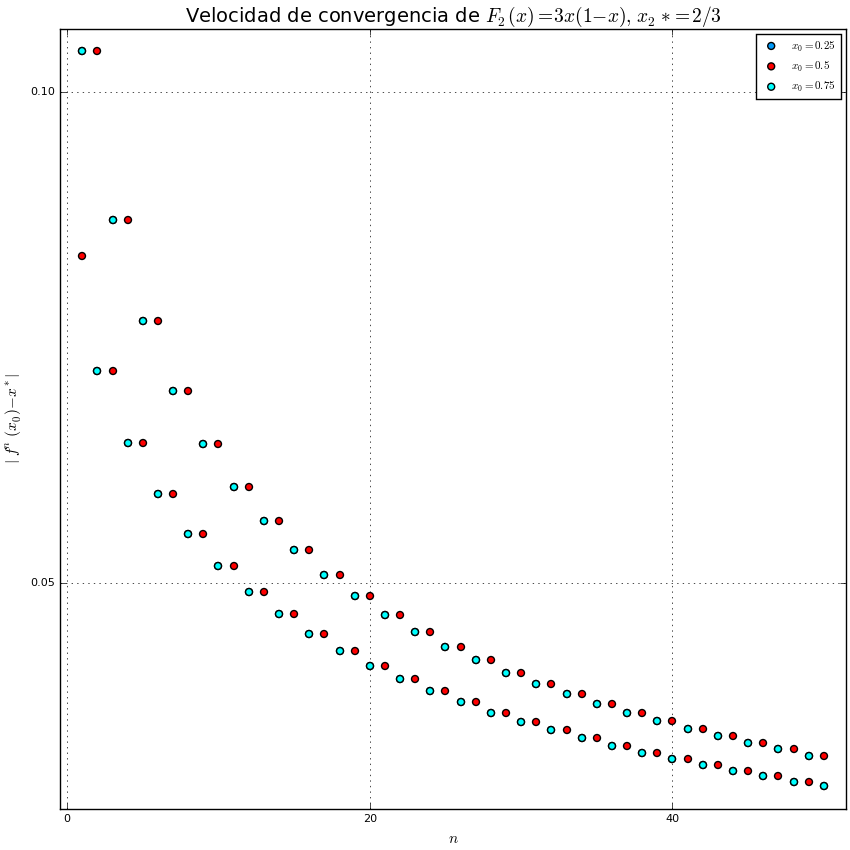

In [11]:
scatter(x1p,label=L"$x_0=0.25$",markersize=5,size=(850,850),)
scatter!(x2p,c=:red,label=L"x_0=0.5",markersize=5,size=(850,850))
scatter!(x3p,c=:cyan,label=L"x_0=0.75",markersize=5,size=(850,850))
title!(L"Velocidad de convergencia de $F_2(x)=3x(1-x), \ x_2*=2/3 $")
ylabel!(L"$| \ f^n (x_0)-x^{*}|$")
xlabel!(L"n")


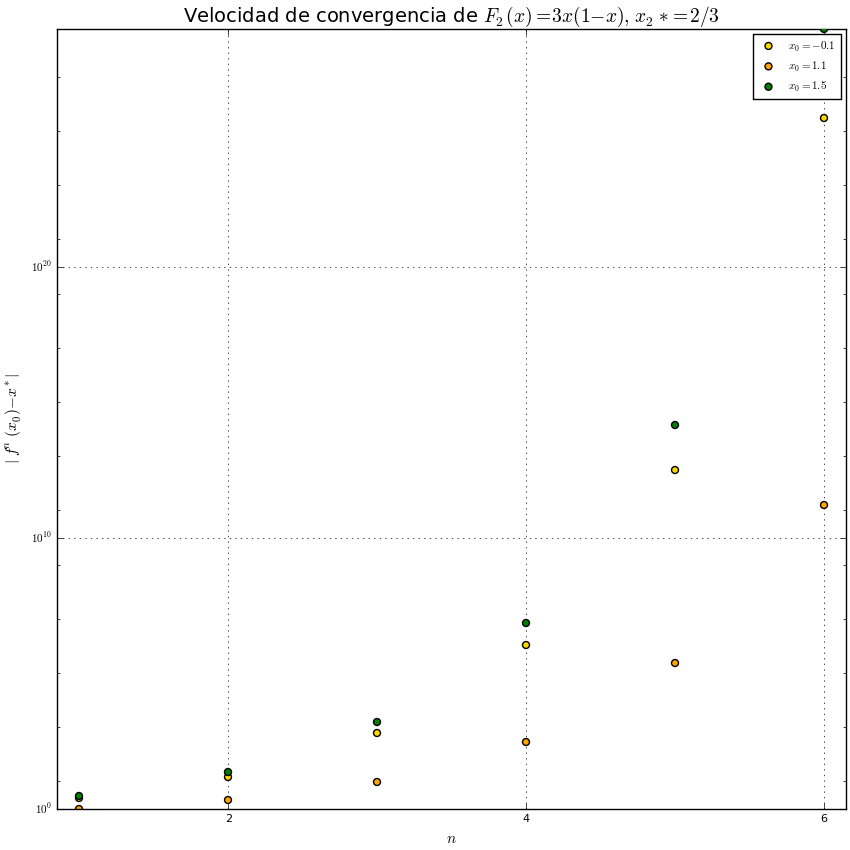

In [12]:
scatter(x4p,yaxis=(:log10),c=:gold,label=L"x_0=-0.1",markersize=5,size=(850,850))
scatter!(x5p,c=:orange,label=L"x_0=1.1",markersize=5,size=(850,850))
scatter!(x6p,c=:green,label=L"x_0=1.5",markersize=5,size=(850,850))
title!(L"Velocidad de convergencia de $F_2(x)=3x(1-x), \ x_2*=2/3 $")
ylabel!(L"$| \ f^n (x_0)-x^{*}|$")
xlabel!(L"n")


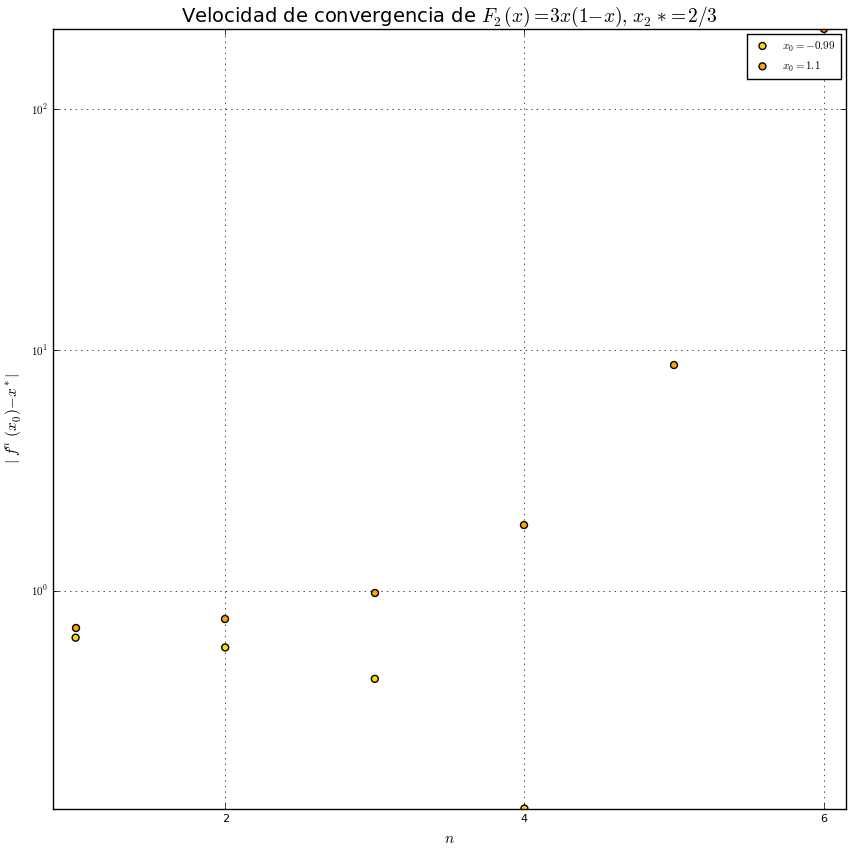

In [13]:
x7=iter_map(F_2,0.99,4)
x8=iter_map(F_2,1.01,6) 
x7p=abs(x7-2/3)
x8p=abs(x8-2/3)
scatter(x7p,yaxis=(:log10),c=:gold,label=L"x_0=-0.99",markersize=5,size=(850,850))
scatter!(x8p,c=:orange,label=L"x_0=1.1",markersize=5,size=(850,850))
title!(L"Velocidad de convergencia de $F_2(x)=3x(1-x), \ x_2*=2/3 $")
ylabel!(L"$| \ f^n (x_0)-x^{*}|$")
xlabel!(L"n")

De estas tres gréaficas vemos que el punto fijo $x_2^*=2/3$ se comporta como atractor para condiciones iniciales $x_0$ que satisfacen:

$$x_0 \in (0,1)$$

y para condiciones iniciales fuera de este intervalo el punto fijo se comporta como repulsor.

Notemos también que $x_0=0$ y $x_0=1$ son puntos super estables pues $F(0)=0$ y $F(1)=0$, y que estos corresponden a los puntos en donde la órbita cambia de estabilidad de atractora a repulsora.

## Análisis de $F_3(x)=exp(x-1)$


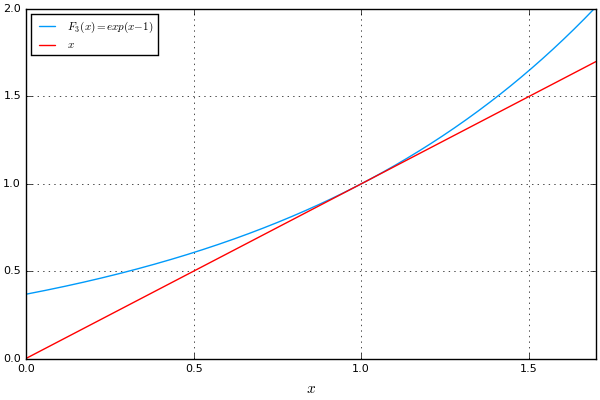

In [14]:
xrange=0:1/2^8:1.7
plot(xrange,F_3,ylim=(0,2),label=L"F_3(x)=exp(x-1)")
plot!(xrange,identity,color=:red,label=L"x")
xlabel!(L"x")

Para encontrar los puntos fijos que son soución a 

$$F_3(x^*)=exp(x^*-1)=x^*$$

definamos la función $$G_3(x)=exp(x-1)-x$$ y encontremos sus raíces con el método de Newton definido a continuación.

In [15]:
"""Método de Newton para una función F(x) cond erivada F´(x), se itera m veces a partir de una 
condición inicial x0."""
function newton(f,f´,x_0,m)
    x=x_0
    for i in 1:m
        x=x-(f(x))/f´(x)  
    end 
    return x
end 

newton (generic function with 1 method)

In [16]:
G3(x)=exp(x-1)-x
G3´(x)=exp(x-1)-1;


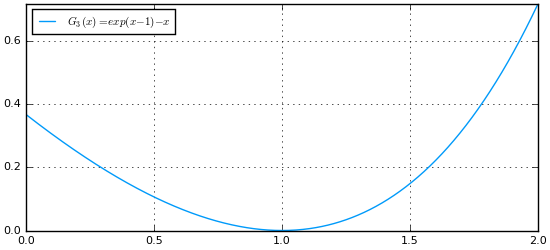

In [17]:
xrange=-0:1/2^8:2
plot(xrange,G3,label=L"G_3(x)=exp(x-1)-x",size=(550,250))

De la gráfica anterior vemos que la raíz esta en $x=1$. Comprobando con el método de Newton obtenemos:

In [18]:
newton(G3,G3´,1.2,1000)

1.0000000034975847

Luego, el punto fijo de $F_3$ es $x^*=1$ y ahí la derivada del mapeo $F_3´(1)=1$. Por lo tanto debemos explorar si éste se comporta como atractor o repulsor para algunas condiciones iniciales.

In [19]:
m=20
x1=iter_map(F_3,1.1,m)
x2=iter_map(F_3,0.9,m)
x3=iter_map(F_3,0.,m)
x4=iter_map(F_3,1.5,3) #diverge
x5=iter_map(F_3,0.5,30) #superestable??
x6=iter_map(F_3,-10.,10);#explota
xf=1
x1p=abs(x1-xf)
x2p=abs(x2-xf)
x3p=abs(x3-xf)
x4p=abs(x4-xf)
x5p=abs(x5-xf)
x6p=abs(x6-xf);


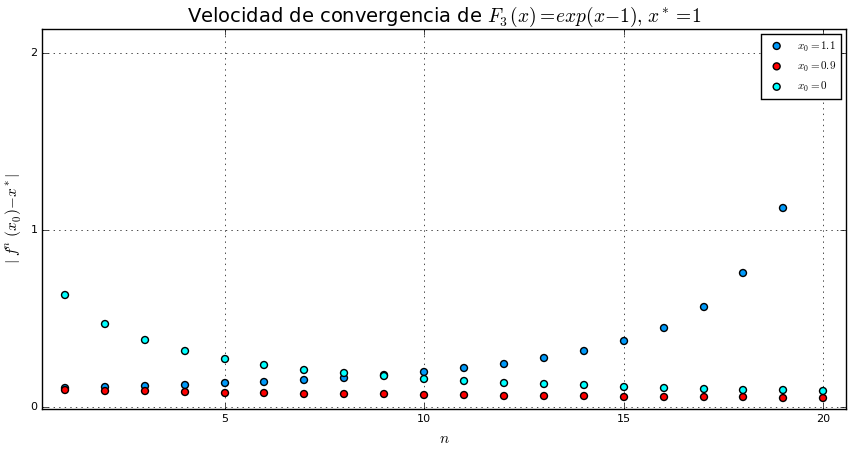

In [20]:
scatter(x1p,label=L"$x_0=1.1$",markersize=5,size=(850,450),)
scatter!(x2p,c=:red,label=L"x_0=0.9",markersize=5,size=(850,450))
scatter!(x3p,c=:cyan,label=L"x_0=0",markersize=5,size=(850,450))
title!(L"Velocidad de convergencia de $F_3(x)=exp(x-1), \ x^*=1 $")
ylabel!(L"$| \ f^n (x_0)-x^{*}|$")
xlabel!(L"n")


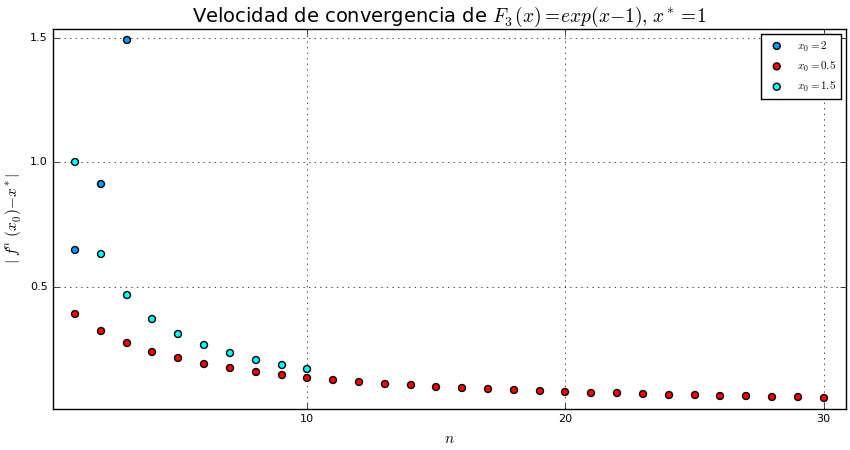

In [21]:
scatter(x4p,label=L"$x_0=2$",markersize=5,size=(850,450),)
scatter!(x5p,c=:red,label=L"x_0=0.5",markersize=5,size=(850,450))
scatter!(x6p,c=:cyan,label=L"x_0=1.5",markersize=5,size=(850,450))
title!(L"Velocidad de convergencia de $F_3(x)=exp(x-1), \ x^*=1$")
ylabel!(L"$| \ f^n (x_0)-x^{*}|$")
xlabel!(L"n")

La velocidad de convergencia de esta función esta determnada por cuánto esten las condiciones iniciales cerca del punto fijo. En este caso toda $x_0\geq1$ termina divergiendo, es decir que el punto fijo $x^*=1$ es repulsivo para estas condiciones inciales y atractivo para los $x_0\leq1$. Además entre más cerca se esté del punto fijo la velocidad de convergencia  correspondiente a las las pendientes de las curvas pintadas

## Análisis de $F_4(x)=x^2-1.25$


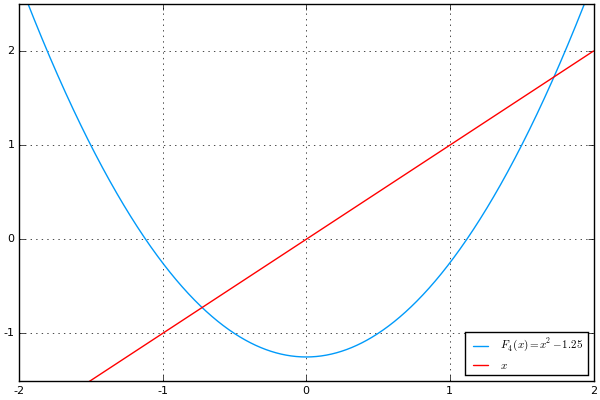

In [22]:
xrange=-2:1/2^8:2
plot(xrange,F_4,ylim=(-1.5,2.5),label=L"F_4(x)=x^2-1.25")
plot!(xrange,identity,color=:red,label=L"x")

Cuyos puntos fijos son:

$$x_{1,2}^*=1/2\pm 1/2\sqrt{6}$$

In [23]:
G4(x)=x^2-1.25-x
G4´(x)=2x-1

G4´ (generic function with 1 method)

In [24]:
xfix1=newton(G4,G4´,-0.5,20) #enctontramos los puntos fijos
xfix2=newton(G4,G4´,1.5,20)
xfix1,xfix2

(-0.724744871391589,1.7247448713915892)

In [25]:
F_4´(xfix1),F_4´(xfix2)

(-1.449489742783178,3.4494897427831783)

La derivada de $F_4$ vale en los puntos fijos 

$$F_4(x_1^*)=-1.4494.. , \ F_4(x_2^*)=3.4494...$$

por tanto, ambos son repulsores, pero es de interés estudiar la velocidad de convergencia de las condiciones iniciales que están en el intervalo 

$$x_0\in (x_1^*,x_2^*)$$

In [26]:
m=25
x1=iter_map(F_4,xfix2-0.1,m)
x2=iter_map(F_4,xfix1+0.1,m)
x3=iter_map(F_4,0.,m)
x4=iter_map(F_4,0.5,m)
x5=iter_map(F_4,-3.,7) 
x6=iter_map(F_4,xfix2+0.1,7);
xf=xfix2
xf=xfix1
x1p=abs(x1-xf)
x2p=abs(x2-xf)
x3p=abs(x3-xf)
x4p=abs(x4-xf)
x5p=abs(x5-xfix1)
x6p=abs(x6-xfix2);


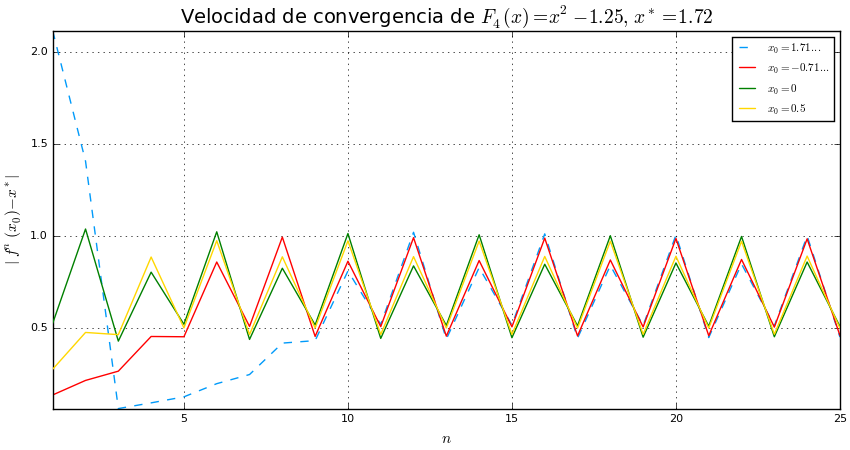

In [27]:
plot(x1p,label=L"$x_0=1.71...$",markersize=5,size=(850,450),l=(1,:dash))
plot!(x2p,c=:red,label=L"x_0=-0.71...",markersize=5,size=(850,450))
plot!(x3p,c=:green,label=L"x_0=0",markersize=5,size=(850,450))
plot!(x4p,c=:gold,label=L"x_0=0.5",markersize=5,size=(850,450))
title!(L"Velocidad de convergencia de $F_4(x)=x^2-1.25, \ x^*=1.72 $")
ylabel!(L"$| \ f^n (x_0)-x^{*}|$")
xlabel!(L"n")

Vemos que para estas condiciones iniciales, las distancias $|F^n_5(x_0)-x^*|$, oscilan y no caen a cero. Esto quiere decir que todas las condiciones iniciales $x_0\in (x_1^*,x_2^*)$, caen en órbitas periódicas de periodo 2 pues las distancias solo oscilan entre dos valores.


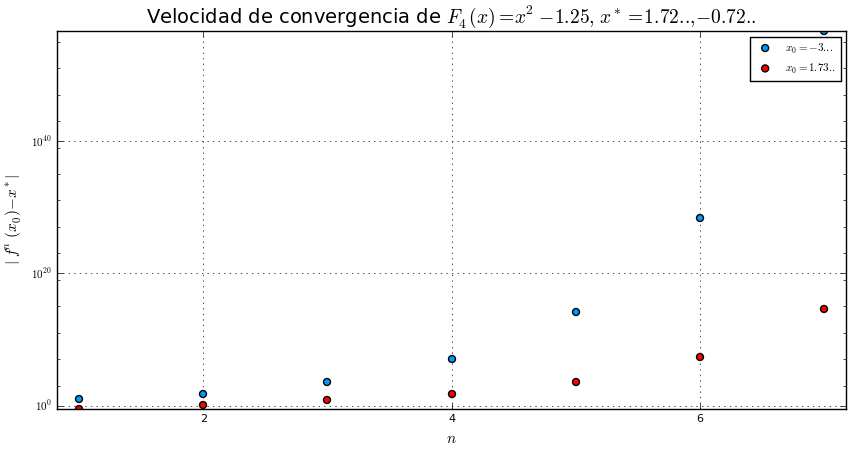

In [28]:
scatter(x5p,yaxis=(:log10),label=L"$x_0=-3...$",markersize=5,size=(850,450),)
scatter!(x6p,c=:red,label=L"x_0=1.73..",markersize=5,size=(850,450))
title!(L"Velocidad de convergencia de $F_4(x)=x^2-1.25, \ x^*=1.72..,-0.72.. $")
ylabel!(L"$| \ f^n (x_0)-x^{*}|$")
xlabel!(L"n")

Vemos que para estas condiciones iniciales, el mapeo diverge.

##Análisis de $F_5(x)=exp(x+1)$


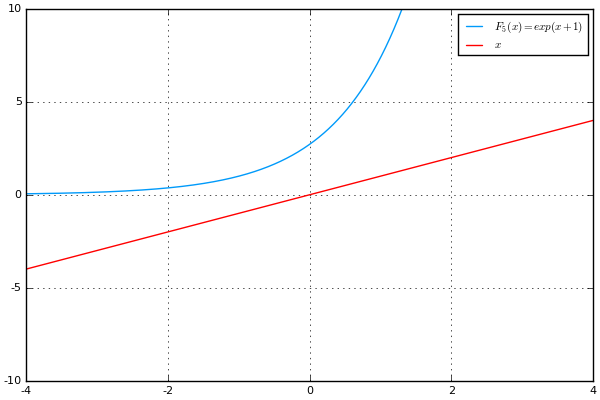

In [29]:
xrange=-4:1/2^8:4
plot(xrange,F_5,ylim=(-10,10),label=L"F_5(x)=exp(x+1)")
plot!(xrange,identity,color=:red,label=L"x")

Como se observa en la gráfica, $F_5(x)$ no tiene puntos fijos.
Por lo que solo hay un punto al que se va el mapeo después de muchos iterados ($n\rightarrow \infty$)

$$ \ F^n_5(x) \rightarrow \infty$$

In [30]:
iter_map(F_5,-0.5,5)

5-element Array{Float64,1}:
   1.64872  
  14.136    
   3.74507e6
 Inf        
 Inf        

In [31]:
iter_map(F_5,-30000.,5)

5-element Array{Float64,1}:
   0.0       
   2.71828   
  41.1936    
   2.11071e18
 Inf         

In [32]:
iter_map(F_5,-1.,5)

5-element Array{Float64,1}:
    1.0    
    7.38906
 4398.66   
  Inf      
  Inf      

In [33]:
iter_map(F_5,4.,5)

5-element Array{Float64,1}:
 148.413     
   7.75016e64
 Inf         
 Inf         
 Inf         

In [34]:
iter_map(F_5,0.000001,5)

5-element Array{Float64,1}:
   2.71828   
  41.1937    
   2.11095e18
 Inf         
 Inf         

Como se observa en las iteraciones, basta con dos o tres para que el mapeo se vaya a $\infty$, por lo que no es conveniente dibujar gráficas para observar la velocidad de divergencia del mapeo.

**Ejercicio 1:**

Llamemos $c_n$ el valor del parámetro $c$ donde ocurre la bifurcación de doblamiento de periodo para el mapeo $Q_c(x)$, donde la órbita de periodo $2^n$ nace. Es decir, tenemos que $c_0=1/4$ marca la aparición del atractor de periodo $2^0=1$, $c_1=-1/4$ corresponde a la aparición del atractor de periodo $2^1=2$, $c_2=-3/4$ a la aparición del atractor de periodo $2^2=4$, etc. 

A partir de estos valores y otros que calcularán (al menos deben encontrar $c_6$), definimos la secuencia: $\{f_0, f_1, f_2, \dots\}$, donde

\begin{equation}
f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}} .
\end{equation}

La pregunta es, ¿a qué valor converge esta secuencia?, es decir, dar una estimación de $f_\infty$.



*Hint:* Para realizar este ejercicio deben calcular el atractor para varias valores de $c$, de tal manera que puedan aislar las órbitas de periodo $2^p$ y de ahí determinar varios valores $c_n$. Sin embargo, van a requerir suficiente cuidado para obtener una buena aproximación de $c_n$. 

Una opción, que tiene ciertos inconvenientes numéricos que también ciertas ventajas se basa en recordar/usar que las bifurcaciones de doblamiento de periodo ocurren cuando los puntos de la órbita de periodo $p$ se tornan en repulsores, es decir, $(Q_c^p)'(x)=-1$. Esta opción, entonces, involucra obtener los valores $c_n$ usando los polinomios $Q_c^p(x)$ y diferenciación automática.

In [35]:
#using PyPlot;

In [36]:
"""Funcion que devuelve un arreglo `diagBif´ con los últimos Nlast iterados de un mapeo f(x,c),
en donde c es un párametro. También devuelve un arreglo `cs´ que permite graficar el diagrama
de bifurcaciones
Los parámetros de entrada son los siguientes: 
-) f(x,c): la función a evaluar
-) crange: rango en el que se tomaran los valores del parámetro c
-) n: el número de iteraciones del mapeo
-) x0: la condición inicial
-) Nlast: los últimos iterados que se desea iterar para obtener las orbitas del diagrama de 
bifurcaciones
"""
function Bif_diag(f,crange,n,x0,Nlast)
diagBif=Float64[]
cs=Float64[]
    for c in crange
        Q(x)=f(x,c)
        x=iter_map(Q,x0,n)
        for i in 0:Nlast
            push!(cs,c)
            bif=x[end-i]
            push!(diagBif,bif)
        end
    end
        return cs,diagBif   
end 

Bif_diag (generic function with 1 method)

In [37]:
ces=-2:1/2^10:0.25 #Definimos el intervalo en donde variamos el parámetro del mapeo cuadrático
Qc(x,c)=x^2+c
Qc´(x)=2x #mapeo cuadrático

Qc´ (generic function with 1 method)

In [38]:
x0=0.01 #parametros para pintar el mapeo cuadrático.
n=10000
Nlast=500;

In [39]:
cs,diagBif=Bif_diag(Qc,ces,n,x0,Nlast);


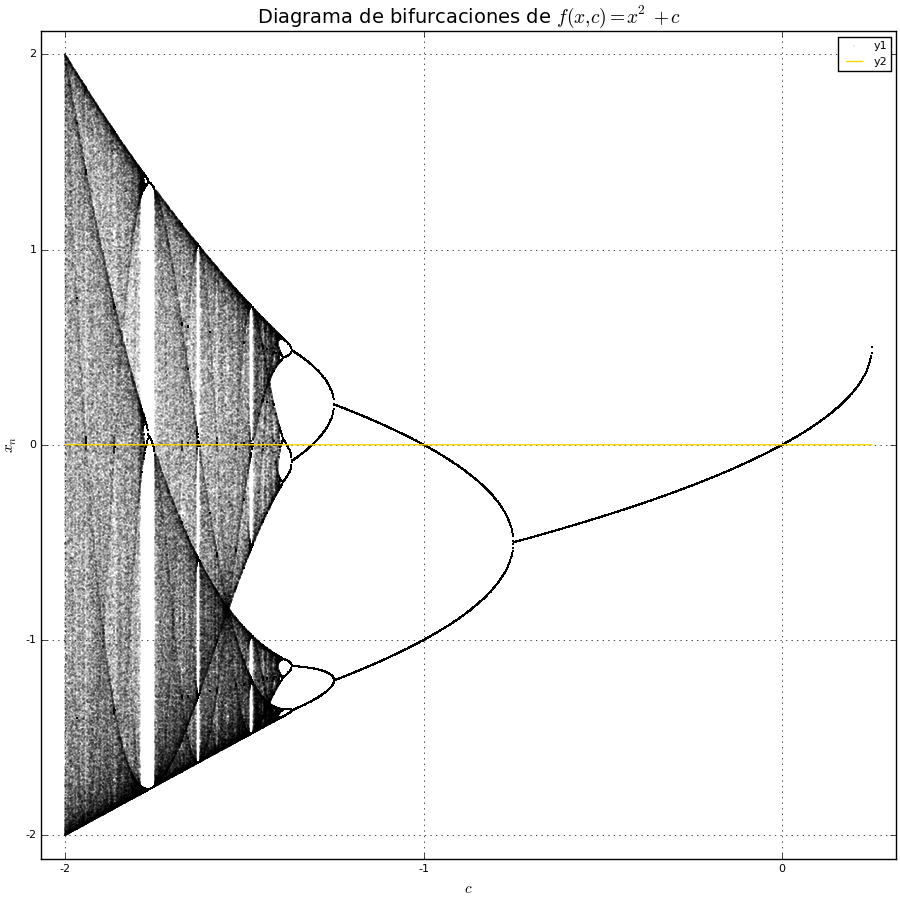

In [40]:
scatter(cs,diagBif, markersize=0.05, xaxis=(L"c"), 
ylabel=L"x",title=(L"Diagrama de bifurcaciones de $f(x,c) = x^2 + c$"),size=(900,900))
plot!(ces,zeros(length(ces)),c=:gold)
xlabel!(L"c")
ylabel!(L"x_n")


Para encontrar los puntos de bifurcación se utilizó el siguiente algoritmo:

- Escoger dos parámetros $c_1, \ c_2$ y determinar el periodo de la órbita que se obtiene de iterar $n$ veces la condición inicial $x_0$ con los dos parámetros.
- Si los periodos son diferentes entonces existe un punto de bifurcación en el intervalo definido y para encontrarlo se define el punto medio $c_{med}=(c_1+c_2)/2$ y  se determina el periodo de la orbita obtenida de iterar e mapeo con el parámetro $c_{med}$
- Si el periodo de la órbita con $c_{med}$ es igual al de $c_1$ (ó  puede ser igual al de c_2) entonces quiere decir que el punto de bifurcación está en el nuevo intervalo definido  intervalo $(c_{med},c_2)$ (en el otro caso el punto de bif. está en $(c_1,c_{med}))$. Se repite entonces el proceso de encontrar el punto medio de este nuevo intervalo y se hace este procedimiento muchas veces hasta que la longitud del intervalo sea menor que una tolerancia dada para el algoritmo.

- Para automatizar el proceso en el intervalo de parámetros de para $c$ se definió una función que a patir de un parámetro inicial $c_0$ fuera cambiando por medio de un 'step' variable el otro extremo del intervalo, digamos un $c_1$  para definir el intervalo $(c_1,c_0)$ para realizar el proceso anteriormente descrito e ir encontrando los puntos de bifurcaciónd el mapeo cuadrático. En esta función también se definieron algunas "stopping-rules" que tenían que ver con la longitud de las órbitas. 

In [41]:
"""esta función calcula la longitud de la orbita de la iteración de f(x,c) a partir de una 
condición inicial x0 y un parámetro c. La función itera n veces la condicion inicial y 
a partir de ahí ve los valores distintos de las x_{n+i} para determinar la longitud de la 
orbita.
"""
function orbit_length(f,x0,c,n)
    G(x)=f(x,c)
    x=x0
    tol=1e-8
    cont=1
    for i in 1:n
        x=G(x)
    end 
    xf=x
    xorbit=G(xf)
    while abs(xf-xorbit)>tol
        cont=cont+1
        xorbit=G(xorbit)   
        if cont>1025
            println("stopping rule alcanzada")
            break
        end 
    end 
    return cont
end 
      

orbit_length (generic function with 1 method)

#####Ejemplo de cómo funciona la función 'orbit_length'
Tomamos el mapeo cuadrático, la condición inicial $x_0=0.1$, $c=-1$ (en donde sabemos que la órbita es de periodo $2$), y 10,000 iterados:


In [42]:
orbit_length(Qc,0.1,-1,10000)

2

In [43]:
"""funcion que determina (si es que existe) el punto de bifurcación de un mapeo Qc(x,c)
entre dos valores de
parámetro c1 y c2 con Norb iteraciones a partir de la condicion inicial x0
En caso de existir bifurcación, la función devuelve el valor del parámetro 
'Cb' en donde se presenta la bifurcación
NOTA: Funciona mejor con Norb>1000000"""

function point_bif(Qc,c1,c2,x0,Norb)
L1=orbit_length(Qc,x0,c1,Norb)
L2=orbit_length(Qc,x0,c2,Norb)
tol=1e-12
    if (L1-L2)==0
        nothing
    else
     while abs(c1-c2)>tol
        cmed=(c1+c2)/2
        Lmed=orbit_length(Qc,x0,cmed,Norb)
        if Lmed==L1
            c1=cmed
            L1=orbit_length(Qc,x0,c1,Norb)
        else Lmed==L2
            c2=cmed
            L2=orbit_length(Qc,x0,c2,Norb)
        end  
        end
    end 
    cb=(c1+c2)/2
    return cb
    
end 

point_bif (generic function with 1 method)

#### Ejemplo: 
Sabemos que entre los parámetros $c=-1$ y $c=-0.6$ existe el punto de bifurcación $c_b=-0.75$

In [44]:
point_bif(Qc,-1,-0.6,0.01,500000)

-0.7499722667063905

**Observación**: Existen errores numéricos que impiden obtener el valor exacto $-0.75$

In [45]:
"""función que automatiza la búsqueda de puntos de bifurcación a partir de un parámetro 
inicial c0, se define un parametro c1 a partir de un step y se calcula si hay o no punto 
de bifurcación entre c0 y c1. Se repite el proceso cambiando estos dos parámetros que 
definen los extremos del intervalo de parametros c en donde se buscan las bifurcaciones.
"""
function bif_points(Qc,x0,c0,init_step,Norb)
    
    bif_pointspru=Float64[]
    c1=c0+init_step
    #tol=1e-10
    L0=orbit_length(Qc,x0,c0,Norb)
    L1=orbit_length(Qc,x0,c1,Norb)
    s=init_step
    while L1<1025
        if L1>8
            init_step=s/100
        end 
        if L1>64
            init_step=s/5000
        end
        if L1>256
            init_step=s/10000
        end 
        if L1==L0
            c1=c1+init_step
            L1=orbit_length(Qc,x0,c1,Norb)
            #println(c1)
        else 
            cbirf=point_bif(Qc,c0,c1,x0,Norb)
            push!(bif_pointspru,cbirf)
            c0=cbirf
            c1=c0+init_step
            L0=orbit_length(Qc,x0,c0,Norb)
            L1=orbit_length(Qc,x0,c1,Norb)
        end 
    end 
    return bif_pointspru
end 


bif_points (generic function with 1 method)

In [46]:
"""función que quita los valores repetidos de puntos de bifurcación que se obtienen con la 
función bif_points. La función también quita los valores repetidos de un arreglo en general"""
function clean(bifs)
    bifsclean=Float64[]
    tol=1e-10
    eq=bifs[1]
    push!(bifsclean,eq)
    for i in 1:length(bifs)-1
        if abs(bifs[i+1]-bifs[i])<tol
            nothing
        else 
            eq=bifs[i+1]
            push!(bifsclean,eq)
        end
    end 
    return bifsclean
end 

clean (generic function with 1 method)

Para calcular los coeficientes de Feigenbaum dados por 
\begin{equation}
f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}} .
\end{equation}
se escribió la siguiente función.

In [47]:
"""Función que calcula los parámetros de Feigenbaum con los puntos de bifurcación dados 
en un arreglo cs"""
function fn_ratio(cn)
    fn=Float64[]
    for i in 1:length(cn)-2
        ratio=(cn[i]-cn[i+1])/(cn[i+1]-cn[i+2])
        push!(fn,ratio)
    end 
    return fn
end 

fn_ratio (generic function with 1 method)

Calculemos los puntos de bifurcación con la condición inicial $x_0=-0.6$, $c_0=-0.6$ y un step inicial de $-1\times10^{-2}$

In [48]:
x0=0.001
Norb=1000000
c0=-0.6
init_step=-1e-2;

In [49]:
bifPOINTS=bif_points(Qc,x0,c0,init_step,Norb);

stopping rule alcanzada


In [50]:
bifPOINTScl=clean(bifPOINTS)
[println(bifPOINTScl[i]) for i in 1:length(bifPOINTScl)];

-0.7499864926833653
-1.2499935256646773
-1.3680961760481938
-1.3940450205497386
-1.3996307761212283
-1.4008285547504604
-1.4010851955007233
-1.4011401871904667
-1.4011519727247295
-1.401154499157124


In [51]:
feigen=fn_ratio(bifPOINTScl)

8-element Array{Float64,1}:
 4.23366
 4.55136
 4.64554
 4.66343
 4.66714
 4.6669 
 4.66603
 4.66489

$c_n$ | Valores calcuados | Ref. en [Wikipedia](https://en.wikipedia.org/wiki/Feigenbaum_constants#The_first_constant) | $f_n$ 
-- | -- | -- | -- 
$c_1$ | -0.7499864|0.75|$f_1=$4.233 66
$c_2$ |-1.249 993  |-1.25|$f_2=$ 4.551 36
$c_3$ |-1.368 096 1 |−1.368 098 9| $f_3=$4.645 54
$c_4$ |-1.394 045 0 | 	−1.394 046 2| $f_4=$4.663 43
$c_5$ | -1.399 630 776 129 |−1.399 631 2|$f_5=$4.667 14
$c_6$ |-1.400 828 554 724 |−1.400 828 7| $f_6=$4.666 9
$c_7$ | -1.401 085 195 504 | 	−1.401 085 3| $f_7=$4.666 02
$c_8$ | -1.401 140 187 176 | 	−1.401 140 2|$f_8=$4.664 88
$c_9$ |-1.401 151 972 744 |−1.401 151 982 029|
$c_{10}$ | -1.401 154 499 188 |−1.401 154 502 237|


Vemos que el método implementado logra acercarse mucho a lo reporteado en wikipedia para los valores de los 10 primeros puntos de bifurcación y los coeficientes de Feigenbaum tienden a un valor aproximado de 

$$f_{\infty}=4.664 ,88$$

cuyo valor aceptado de acuerdo a la misma referencia en [Wikipedia](https://en.wikipedia.org/wiki/Feigenbaum_constants#The_first_constant) es de 

$$f_{\infty}=4.669, 201$$

**Ejercicio 2:**

Repitan el ejercicio anterior para el mapeo $S_c(x) = c \sin(x)$. ¿Cómo se comparan los valores obtenidos de $f_n$?

In [52]:
Sc(x,c)=c*sin(x)
x0=0.50 #parametros para pintar el mapeo cuadrático.
n=10000
Nlast=500;
ces=-5:1/2^10:5

-5.0:0.0009765625:5.0

In [53]:
cs,diagBif=Bif_diag(Sc,ces,n,x0,Nlast);


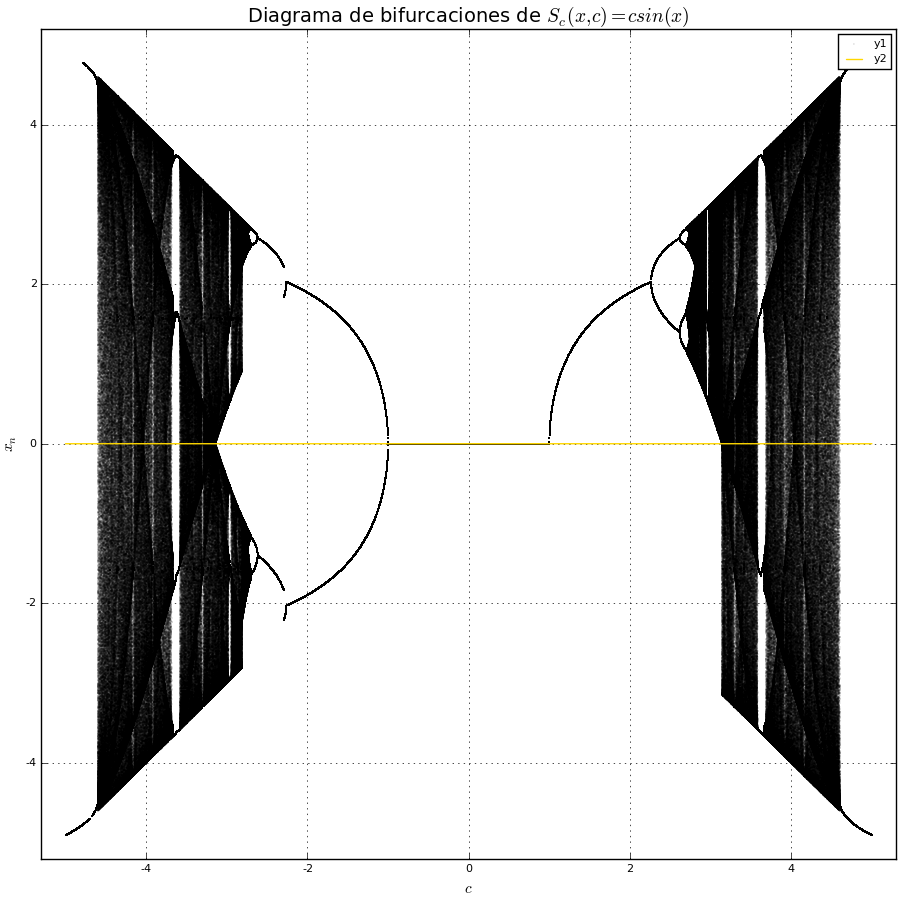

In [54]:
scatter(cs,diagBif, markersize=0.05, xaxis=(L"c"), 
ylabel=L"x",title=(L"Diagrama de bifurcaciones de $S_c(x,c) = csin(x)$"),size=(900,900))
plot!(ces,zeros(length(ces)),c=:gold)
xlabel!(L"c")
ylabel!(L"x_n")

Nos quedamos con el intervalo $c \in (0,3.1)$ por que fuera de ese intervalo no se que está ocurriendo y ahí se observan bien las bifurcaciones del mapeo.

In [55]:
ces=0:1/2^10:3.1
cs,diagBif=Bif_diag(Sc,ces,n,x0,Nlast);


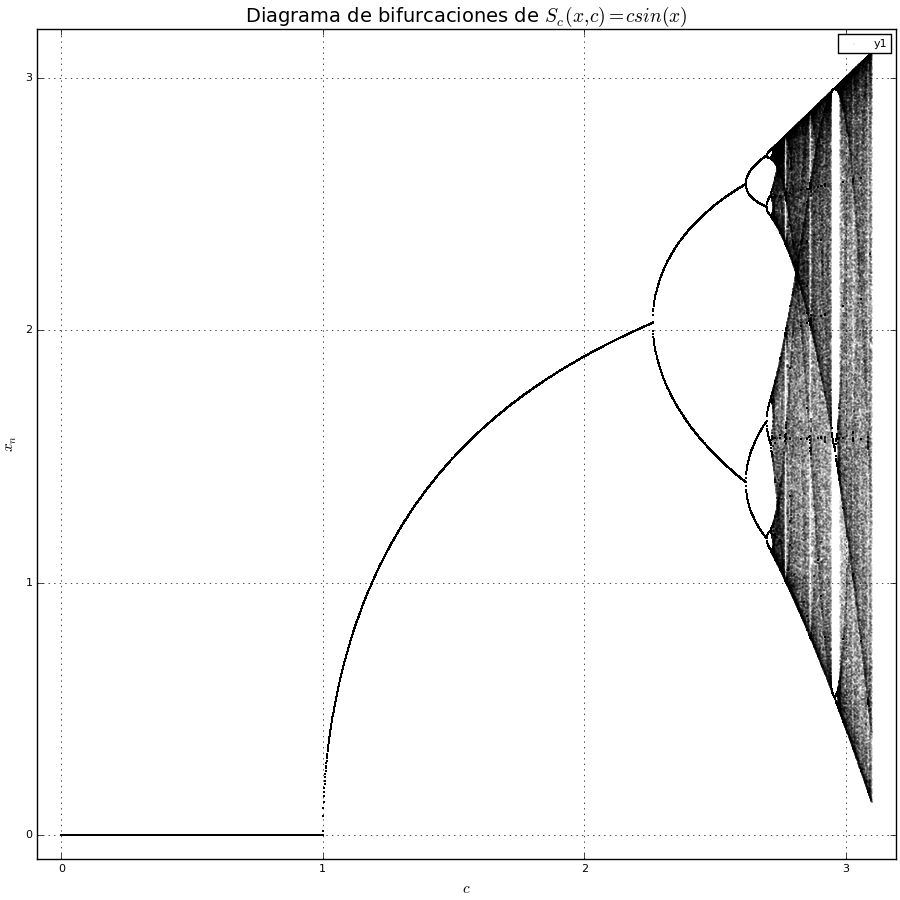

In [56]:
scatter(cs,diagBif, markersize=0.05, xaxis=(L"c"),
ylabel=L"x",title=(L"Diagrama de bifurcaciones de $S_c(x,c) = csin(x)$"),size=(900,900))
#plot!(ces,zeros(length(ces)),c=:gold)
xlabel!(L"c")
ylabel!(L"x_n")

In [57]:
x0=1.
Norb=1000000
c0=2.0 #empezamos con este parámetro por que vemos que para todo parámetro con c<2 tiende a 
#una orbita de periodo 1
init_step=1e-2;

In [58]:
bifPOINTS=bif_points(Sc,x0,c0,init_step,Norb);

stopping rule alcanzada


In [59]:
bifSIN=clean(bifPOINTS)
[println(bifSIN[i]) for i in 1:length(bifSIN)];

2.261816412119382
2.6177790921621322
2.6973982335918514
2.714599868351982
2.7182909177728583
2.7190818217136563
2.719251267103911
2.7192875704504074
2.7192953485060736
2.7192970169650126


Vemos que los puntos de bifurcación del mapeo $S_c(x)=csin(x)$ convergen aproximadamente al valor:

$$c_n=2.79297...$$

In [60]:
fn_ratio(bifSIN)

8-element Array{Float64,1}:
 4.47082
 4.62858
 4.66036
 4.66687
 4.6676 
 4.66749
 4.66741
 4.66182

Aqui se observa la universalidad de la cosntante de Feigenbaum, pues el valor al que se observa para la cosntante de Feigenbaum del mapeo $S_c(x)=csin(x)$, converge es casi el mismo valor que para el mapeo cuadrático. Se tiene en este caso:
$$f_{\infty}=4.661...$$

**Ejercicio 3:**

Como se ve en la Fig. 1, $x=0$ pertenece a un ciclo de periodo $2^n$ para ciertos valores $C_n$ del parámetro. Dichos valores son *especiales*, ya que $x=0$ esté en el ciclo de periodo $2^n$ marca los llamados *ciclos superestable*, donde tenemos $(Q^{2^p}_{C_n})'(0)=0$.

¿A qué converge la secuencia $f_n$, definida ahora con los valores $C_n$.

De los $2^p$ puntos del ciclo de periodo $2^p$, es decir, $\{0, p_1, \dots p_{2^{n-1}}\,\}$ hay uno (distinto del 0) cuya distancia a 0 es menor; a ese punto lo identificamos como $d_n$. Calcular numéricamente a dónde converge la secuencia $d_n/d_{n+1}$.

In [61]:
ces=-2:1/2^10:0.25
x0=0.01 #parametros para pintar el mapeo cuadrático.
n=10000
Nlast=500;
cs,diagBif=Bif_diag(Qc,ces,n,x0,Nlast);



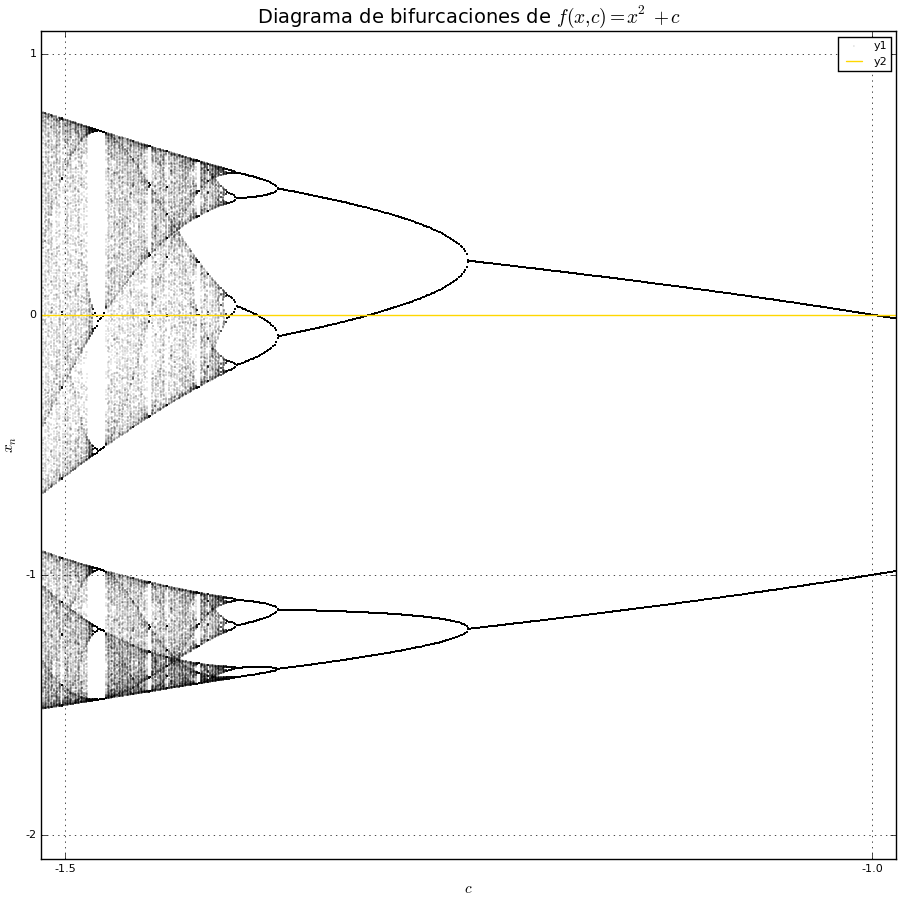

In [62]:
scatter(cs,diagBif,xlim=(-1.5,-1),ylim=(-2,1), markersize=0.05, xaxis=(L"c"),grid=true,
ylabel=L"x",title=(L"Diagrama de bifurcaciones de $f(x,c) = x^2 + c$"),size=(900,900))
plot!(ces,zeros(length(ces)),c=:gold)
xlabel!(L"c")
ylabel!(L"x_n")

Utilizaremos los exponentes de Lyapunov para resolver este problema.
Sabemos que los exponenetes de Lyapunov están dados por las fórmulas:

\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n}\log\Big| \frac{{\rm d} f^{n}}{{\rm d}x}(x_0)\Big|,
\end{equation}

Usando que

\begin{equation}
\frac{{\rm d}f^n}{{\rm d}x}(x_0) = f'(x_0) f'(x_1)\dots f'(x_{n-1}) 
= \prod_{i=1}^{n} f'(x_i), 
\end{equation}

donde $x_i=f^i(x_0)$
obtenemos
\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n} \sum_{i=1}^n \log
\Big| \, f'(x_i)\, \Big|.
\end{equation}



Notemos que si $x=0$ es parte de una órbita periódica entonces $Q´_c(x=0)=2(0)=0$. Por lo tanto el producto 

\begin{equation}
\prod_{i=1}^{n} f'(x_i)=0
\end{equation}

y por tanto 
\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n}\log\Big| \prod_{i=1}^{n} f'(x_i)\Big| \rightarrow -\infty,
\end{equation}

Este comportamiento se observa en los "picos" del diagrama de los exponentes de Lyapunov que mostraré a continuación.

Por lo tanto, **en ciclos superestables**, los exponentes de Lyapunov tienden a $-\infty$ para la familia de mapeos cuadráticos $Q_c(x)=x^2+c$.




Si queremos que $x_0=0$ sea parte de la órbita de periodo $n$, se debe satisfacer que dicho punto sea un punto fijo del mapeo $Q^n_c(x)$. 
Por lo tanto encontrar los puntos superestables se traduce a encontrar las soluciones de

$$Q^n_c(x=0)=0$$



Por ejemplo para n=1, se tiene que 
$$Q_c(x=0)=0 \iff c=0$$

para n=2, se tiene que 

$$Q_c^2(x=0)=(0+c)^2+c=0 \iff c^2+c=0 \iff c(c+1)=0 $$

Por tanto el segundo ciclo super estable se tiene cuando $$ c=-1$$.

Así sucesivamente para toda $n$.

Usemos las funciones definidas por Luis en el [notebook 9](https://github.com/lbenet/2017-1_TSFisComp/blob/master/notas_clase/09_Mapeos1d-4.ipynb) de notas de clase, para calcular las raíces de $Q_c^n$.

In [63]:
"""
    Qcⁿ(x, c,n)

Esta función define el n-enésimo iterado de Qc(x,c),
donde el valor a iterar es `x` y el valor del parámetro
es `c`, donde `c = args[1]` y `n = args[2]`.
"""
function Qcⁿ(x,c,n)
    #c, n = args[1], args[2]
    @assert n >= 0 && isa(n,Int)
    n <= 1 && return Qc(x,c)
    for it = 1:n
        x = Qc(x,c)
    end
    return x
end

Qcⁿ (generic function with 1 method)

In [64]:
"""método de Taylor para encontrar las raíces de una función f(x) a partir de una estimación
inicial x0"""
function roots_newton(f, x0)
    t = Taylor1(1)
    for ind = 1:100
       fT = f(x0+t)
       x0 = x0 - fT.coeffs[1]/fT.coeffs[2]
    end
    x0
end

roots_newton (generic function with 1 method)

La siguiente función calcula toads las posibles raíces reales de los mapeos $Q_c^i$ con $i=1,...2n$ y los devuelve en un  arreglo 'Cn'. Este arreglo corresponde entonces a los parámetros $c$ para los caules se tienen ciclos superestables.

In [65]:
"""Función que encuentra los parametros Cn que corresponden a ciclos super estables
Los parámetros de entrada son 
n=numero de parámetros que se desean encontrar"""
function superstable_Qcmap(n)
    Cn=Float64[]
    crange=0.1:-0.001:-1.401 #rango de estimaciones iniciales para el método de newton
    for i in 1:n
        Qn(c)=Qcⁿ(0,c,2*i)
        for x0 in crange
            Sspoint=roots_newton(Qn,x0)
             #EL último punto de bifurcacion que se calcul
            if Sspoint>-1.401 && Sspoint<=0 #stopping rule
            push!(Cn,Sspoint)
            else 
                nothing
            end 
        end 
    end 
    a=sort(Cn)
    Cn=clean(a)
    return Cn
end 
        
    

superstable_Qcmap (generic function with 1 method)

In [66]:
Cn=superstable_Qcmap(32);


In [67]:
reord=zeros(length(Cn))
[ reord[i+1]=Cn[end-i] for i in 0:length(Cn)-1]
[println(reord[i]) for i in 1:length(Cn)];

0.0
-1.0
-1.310702641336833
-1.3815474844320617
-1.396945359704561
-1.400253081214783
-1.4009619629448422


Calculemos los parámetros 
\begin{eqnarray*}
f_n &=& \frac{C_n-C_{n+1}}{C_{n+1}-C_{n+2}},\\
a_n &=& \frac{d_n}{d_{n+1}},
\end{eqnarray*}
En donde $d_n$ se define como la mínima distancia del punto de la órbita generada a partir de la iteración del mapeo 

$$Q_{C_n}(x)=x^2+C_n$$

con $C_n$ los parámetros que dan las órbitas super estables.
Para encontrar $d_n$ iteramos $Norb=10,000$ el mapeo $Q_{C_n}$ y a partir de ahi guardamos los valores de los iterados $x_m$ con $m\geq Norb$ y tomamos el mínimo de  tales $|x_m|$ 

In [68]:
"""función que determina las distancias d_n del mapeo cuadrático a partir de 
la condición inicial x0=0 utilizando los parámetros de super estabilidad del arreglo Cn"""
function dn(Norb,Cn)
       dn1=Float64[0]
    di=1
    for i in 2:length(reord)
        f(x)=Qc(x,reord[i])
        x0=0.
        m=15000
        xx=iter_map(f, x0, m)
        dist=Float64[]
        for i in 0:63
            push!(dist,xx[end-i])
        end 
    a=abs(dist)
    a=clean(sort(a))
    di=a[2]
    push!(dn1,di)
    end
    return dn1
end 
            

dn (generic function with 1 method)

In [69]:
d_n=dn(15000,reord)

7-element Array{Float64,1}:
 0.0      
 1.0      
 0.407239 
 0.163425 
 0.0653634
 0.0261213
 0.0104369

Con estas distancias mínimas, calculemos la segunda constante de Feigenbaum

In [70]:
α=1
for i in 1:length(d_n)-1
    α=d_n[i]/d_n[i+1]
    println(α)
end 

0.0
2.455561864707475
2.4918945698987063
2.500259001953708
2.5023054105262728
2.5027742269111797


Vemos que $\alpha$ tiende al valor 

$$\alpha =2.502 774 226 911 179 $$

Comparándolo con el valor de [Wikipedia](https://en.wikipedia.org/wiki/Feigenbaum_constants#The_second_constant) dado por

$$\alpha_{wiki} = 2.502 907 875 095$$

podemos decir que los métodos implementados funcionan bien y con esto !!terminamos la tarea 4!!